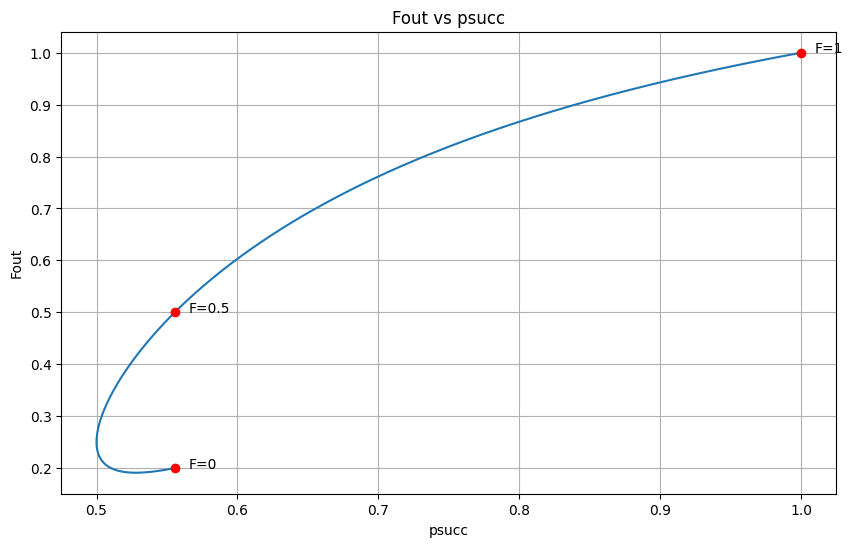

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Define the functions
def calculate_psucc(F):
    return F**2 + 2 * F * ((1 - F) / 3) + 5 * ((1 - F) / 3)**2

def calculate_Fout(F):
    psucc = calculate_psucc(F)
    return (F**2 + ((1 - F) / 3)**2) / psucc

# Generate data points
F_values = np.linspace(0, 1, 1000)  # 1000 points between 0 and 1
psucc_values = [calculate_psucc(F) for F in F_values]
Fout_values = [calculate_Fout(F) for F in F_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(psucc_values, Fout_values)
plt.xlabel('psucc')
plt.ylabel('Fout')
plt.title('Fout vs psucc')
plt.grid(True)

# Add markers for key points (F=0, F=0.5, F=1)
key_points = [0, 0.5, 1]
for F in key_points:
    psucc = calculate_psucc(F)
    Fout = calculate_Fout(F)
    plt.plot(psucc, Fout, 'ro')  # Red dot
    plt.annotate(f'F={F}', (psucc, Fout), xytext=(10, 0), 
                 textcoords='offset points')

plt.savefig('Fout_vs_psucc.svg', format='svg')
plt.show()